<a href="https://colab.research.google.com/github/Navjotkhatri/Airbnb-Bookings-Analysis/blob/main/EDA_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
working_dir_path="/content/drive/MyDrive/Colab Notebooks/python/ Airbnb Bookings Analysis - Capstone Project./Airbnb NYC 2019.csv"
bnb=pd.read_csv(working_dir_path)

# ***Data profiling and cleaning***

In [4]:
bnb.shape

(48895, 16)

In [5]:
bnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [6]:
bnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
#data calculation
bnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

***Lots of null values in this data***

In [9]:
bnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

***We have 4 columns contain a missing value. Now, we drop unnecessary columns such as id, name,last_review.***

In [10]:
#drop irrelevant columns
bnb.drop(["id","name","last_review"], axis=1, inplace=True)

In [11]:
bnb.columns

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

***Replacing all NaN values in “review_per_month_ with 0***

In [12]:
bnb.reviews_per_month.fillna(0, inplace=True)

In [13]:
#after cleaning 
bnb.isnull().sum()

host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

# **Exploration Data and Visualizing**
***Now time to explore our data and visualize it to recognize the relationship between the dataset***.

In [14]:
#last five rows 
bnb.tail()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48890,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.0,2,9
48891,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.0,2,36
48892,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.0,1,27
48893,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.0,6,2
48894,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,0.0,1,23


In [15]:
#type of rooms in this data
number_of_room_type = bnb['room_type'].unique()
number_of_room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
#number of locations
number_of_place=bnb["neighbourhood_group"].unique()
number_of_place

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [17]:
#total rooms by locations
total_room_by_location= bnb.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name="total_room")
print (total_room_by_location)


   neighbourhood_group        room_type  total_room
0                Bronx  Entire home/apt         379
1                Bronx     Private room         652
2                Bronx      Shared room          60
3             Brooklyn  Entire home/apt        9559
4             Brooklyn     Private room       10132
5             Brooklyn      Shared room         413
6            Manhattan  Entire home/apt       13199
7            Manhattan     Private room        7982
8            Manhattan      Shared room         480
9               Queens  Entire home/apt        2096
10              Queens     Private room        3372
11              Queens      Shared room         198
12       Staten Island  Entire home/apt         176
13       Staten Island     Private room         188
14       Staten Island      Shared room           9


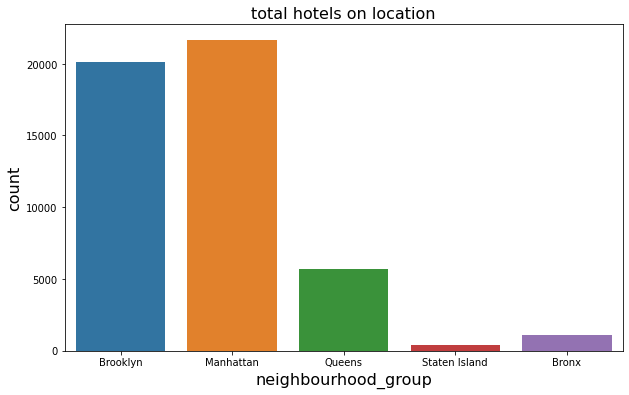

In [18]:
#total hotels chart
plt.figure(figsize=(10,6))
plt.title("total hotels on location",fontsize = 16)
sns.countplot(data=bnb,x='neighbourhood_group')
plt.xlabel("neighbourhood_group",fontsize = 16)
plt.ylabel("count",fontsize = 16)
plt.show()

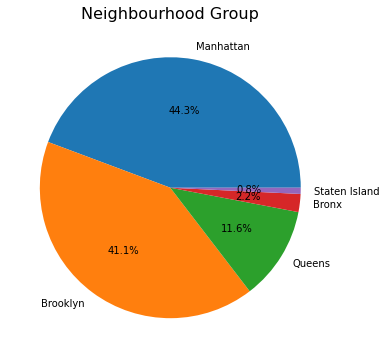

In [19]:
#hotel share per location
plt.figure(figsize=(10,6))
plt.title("Neighbourhood Group",fontsize = 16)
plt.pie(bnb.neighbourhood_group.value_counts(), labels=bnb.neighbourhood_group.value_counts().index,autopct='%1.1f%%')
plt.show()


***The pie and bar chart above shows that Airbnb Listings in  Manhattan, and Brooklyn has the highest share of hotels.***

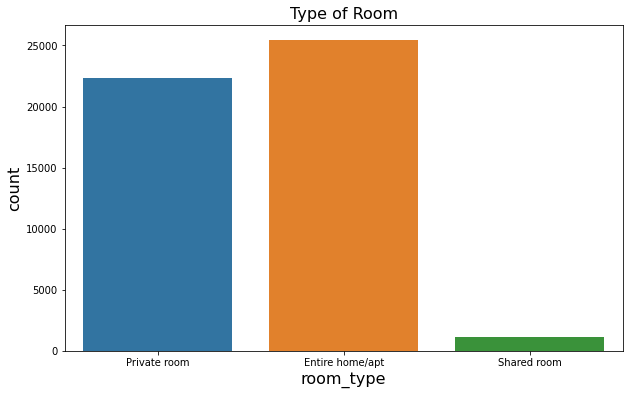

In [20]:
#types of room
plt.figure(figsize=(10,6))
plt.title("Type of Room",fontsize = 16)
sns.countplot(data=bnb,x='room_type')
plt.xlabel("room_type",fontsize=16)
plt.ylabel("count",fontsize=16)
plt.show()

***We can see that the Entire Home/Apartment has the highest share, followed by the Private Room, and the least preferred is Shared Room.***

In [21]:
#location and room type total
bronx_total=total_room_by_location[:3]
brooklyn_total=total_room_by_location[3:6]
manhattan_total=total_room_by_location[6:9]
queens_total=total_room_by_location[9:12]
staten_island=total_room_by_location[12:15]
bronx_total

,neighbourhood_group,room_type,total_room
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60


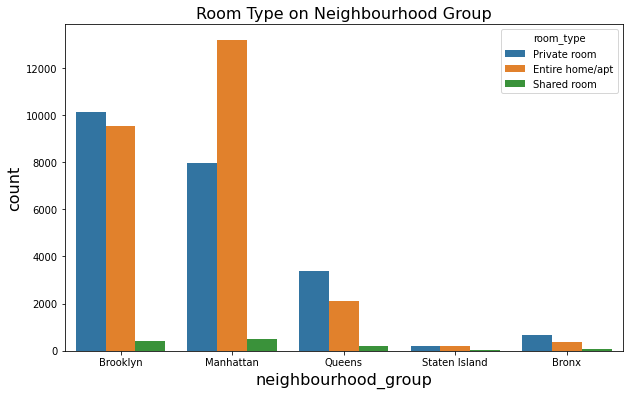

In [22]:
#rooms type per location
plt.figure(figsize=(10,6))
plt.title("Room Type on Neighbourhood Group",fontsize=16)
sns.countplot(data=bnb,x='neighbourhood_group',hue=bnb.room_type)
plt.xlabel("neighbourhood_group",fontsize=16)
plt.ylabel("count",fontsize=16)
plt.show()

***The graph shows that the Entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartments Near Brooklyn are Nearly equal.***

In [23]:
#location vise total availability
average_availability= bnb.groupby(['neighbourhood_group'])['availability_365'].sum().reset_index()
average_availability

,neighbourhood_group,availability_365
0,Bronx,180843
1,Brooklyn,2015070
2,Manhattan,2425586
3,Queens,818464
4,Staten Island,74480


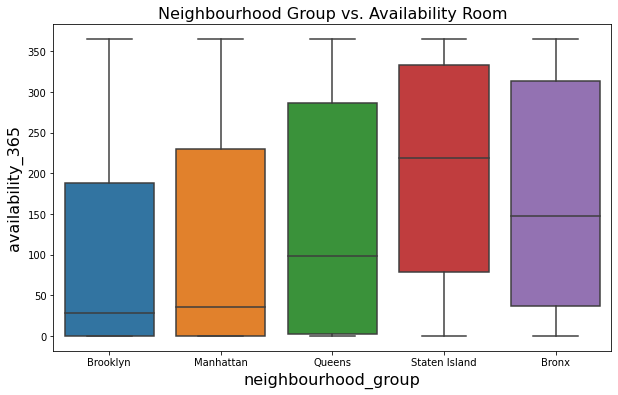

In [24]:
#availability per year
plt.figure(figsize=(10,6))
plt.title("Neighbourhood Group vs. Availability Room",fontsize=16)
sns.boxplot(data=bnb, x='neighbourhood_group',y='availability_365')
plt.xlabel('neighbourhood_group',fontsize=16)
plt.ylabel("availability_365",fontsize=16)
plt.show()

***The above box plot shows the relationship between the availability room and neighborhood group.***

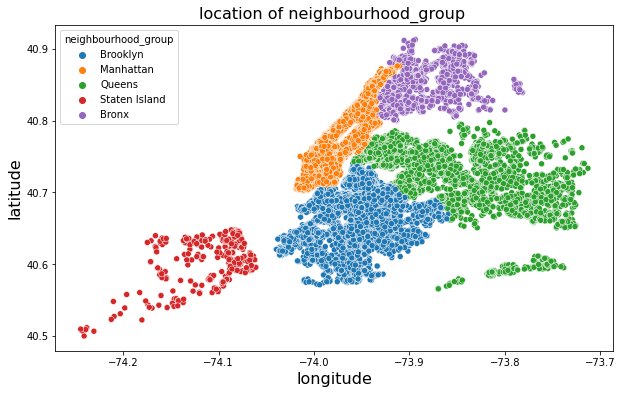

In [25]:
#locations
plt.figure(figsize=(10,6))
sns.scatterplot(x=bnb.longitude,y=bnb.latitude,hue=bnb.neighbourhood_group)
plt.xlabel("longitude",fontsize=16)
plt.ylabel("latitude",fontsize=16)
plt.title("location of neighbourhood_group ",fontsize=16)
plt.show()

***above scatterplot shows that the hotels listed by location*** 

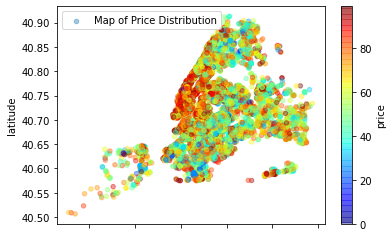

In [26]:
#price hike
bnb[bnb.price<100].plot(kind='scatter', x='longitude',y='latitude',label='Map of Price Distribution',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
plt.show()


***The information we got from the graph above is red color dots are the rooms with a higher price. Also, we can see that the Manhattan region has a more expensive room price.***

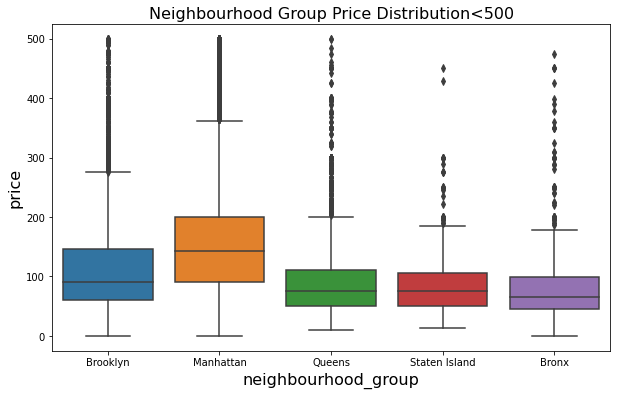

In [27]:
#prices per location
plt.figure(figsize=(10,6))
plt.title("Neighbourhood Group Price Distribution<500",fontsize=16)
sns.boxplot(y="price",x ='neighbourhood_group',data = bnb[bnb.price<500])
plt.xlabel("neighbourhood_group",fontsize=16)
plt.ylabel("price",fontsize=16)
plt.show()

***1-We can say that the Manhattan has the highest price range for the listings,***followed by Brooklyn

2-***Queens and Staten Island seem to have a very similar distribution***,

3-***The Bronx is the cheapest***.

In [28]:
location_reviews = bnb.groupby(['neighbourhood_group'])['number_of_reviews'].sum().reset_index()
location_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,28371
1,Brooklyn,486574
2,Manhattan,454569
3,Queens,156950
4,Staten Island,11541


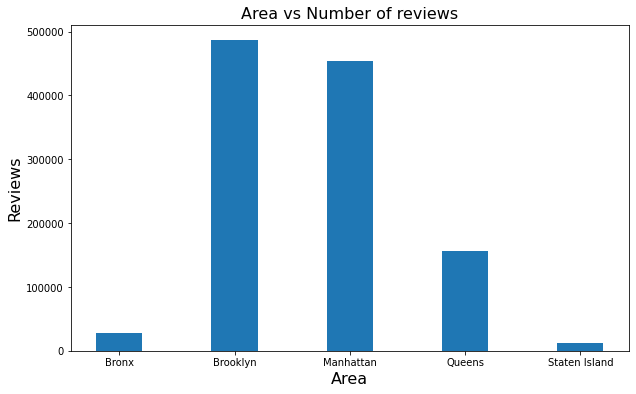

In [29]:
#number of reviews per area
area = location_reviews['neighbourhood_group']
review = location_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 6))
plt.bar(area,review, width = 0.4)
plt.title("Area vs Number of reviews",fontsize=16)
plt.xlabel("Area",fontsize=16)
plt.ylabel("Reviews",fontsize=16)
plt.show()


***above bar plot shows that the brooklyn has a most number of reviews followed by manhattan , least reviews on staten island***

In [30]:
price_area = bnb.groupby(['price'])['number_of_reviews'].max().reset_index()
price_reviews=price_area.head(5)
price_reviews

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


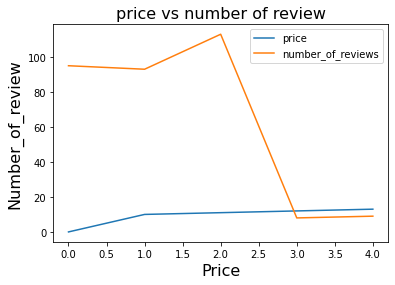

In [31]:
#prices and review relation
price_reviews.plot()
plt.title('price vs number of review',fontsize = 16)
plt.xlabel("Price",fontsize = 16)
plt.ylabel("Number_of_review",fontsize = 16)
plt.show()

***From the above Analysis we can say that most people prefer to stay in place where price is less.***

In [32]:
#top five busiest hosts
busiest_hosts = bnb.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head()
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510


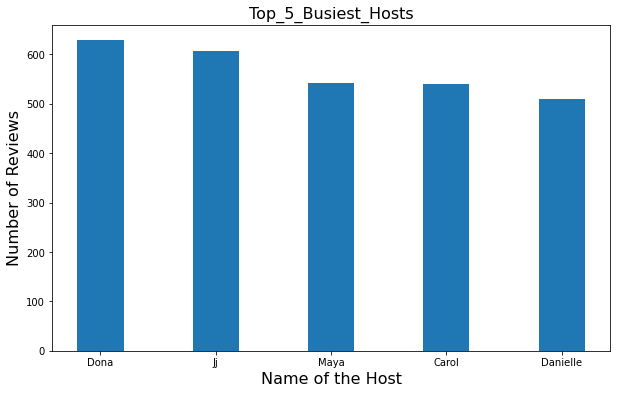

In [33]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10,6))
plt.bar(name, reviews ,width = 0.4)
plt.xlabel("Name of the Host",fontsize = 16)
plt.ylabel("Number of Reviews",fontsize = 16)
plt.title("Top_5_Busiest_Hosts",fontsize = 16)
plt.show()

***from the above bar chart we have a top five busiest hosts..***

1-***Dona***

2-***Jj***

3-***Maya***

4-***Carol***


5-***Danielle*** 

In [34]:
traffic_areas = bnb.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


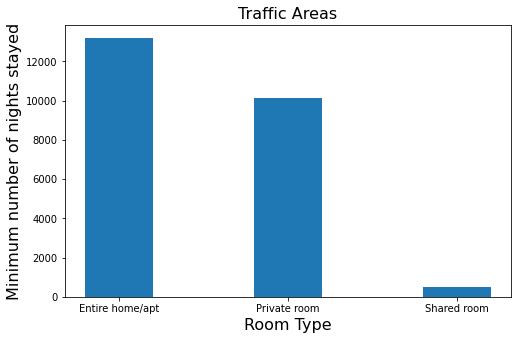

In [35]:
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize = (8,5))
plt.bar(room_type, stayed,width = 0.4)
plt.xlabel("Room Type",fontsize = 16)
plt.ylabel("Minimum number of nights stayed",fontsize = 16)
plt.title("Traffic Areas",fontsize = 16)
plt.show()

***From the Above Analysis We can Say that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens and people are preferring listings which are less in price.***

# ***Conclusion:***
***1--The people who prefer to stay in an Entire home or Apartment are going to stay a bit longer in that particular Neighborhood only.***

***2--The people who prefer to stay in a Private room won't stay longer as compared to a Home or Apartment.***

***3-- Most people prefer to pay less price.***

***4--If there are more number of reviews for a particular neighborhood group that means that a place is a tourist place***.

5***--If people are not staying more than one night means they are travelers.***

***6--For the given data set I found that there are a total of 221 different areas out of which “Williamsburg” has a maximum number of listings.***

7***--There are a total of 37457 hosts and the host with host id- 219517861 “Sonder” is the top host with 327 listings.***

***8--No strong correlation was observed between price, reviews, and location***.

***9--Out of  5 different locations in the dataset, Manhattan is the most crowded location with 44.3% of listings.***

***10--Top five busiest host are Dona,Jj,Maya,Carol,Danielle***. 

***Thank_you***
   
             ---Navjot